In [1]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
df['season']=df['season'].apply(lambda x: {1: 'spring', 2: 'summer', 3: 'fall'}.get(x, 'winter'))

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df[['mnth']]=df[['mnth']].apply(lambda x: x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}))

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df[['weekday']]=df[['weekday']].apply(lambda x: x.map({0: 'sun', 1: 'mon', 2: 'tues', 3: 'wed', 4: 'thurs', 5: 'fri', 6: 'sat'}))

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tues,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df[['weathersit']]=df[['weathersit']].apply(lambda x: x.map({1: 'clear', 2: 'mist', 3: 'snow', 4: 'rainy'}))

In [13]:
df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [16]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df.dteday

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [17]:
intlist = ['casual', 'registered','cnt']
for var in intlist:
     df[var]= df[var].astype('float')

In [18]:
df[intlist].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   casual      730 non-null    float64
 1   registered  730 non-null    float64
 2   cnt         730 non-null    float64
dtypes: float64(3)
memory usage: 17.2 KB


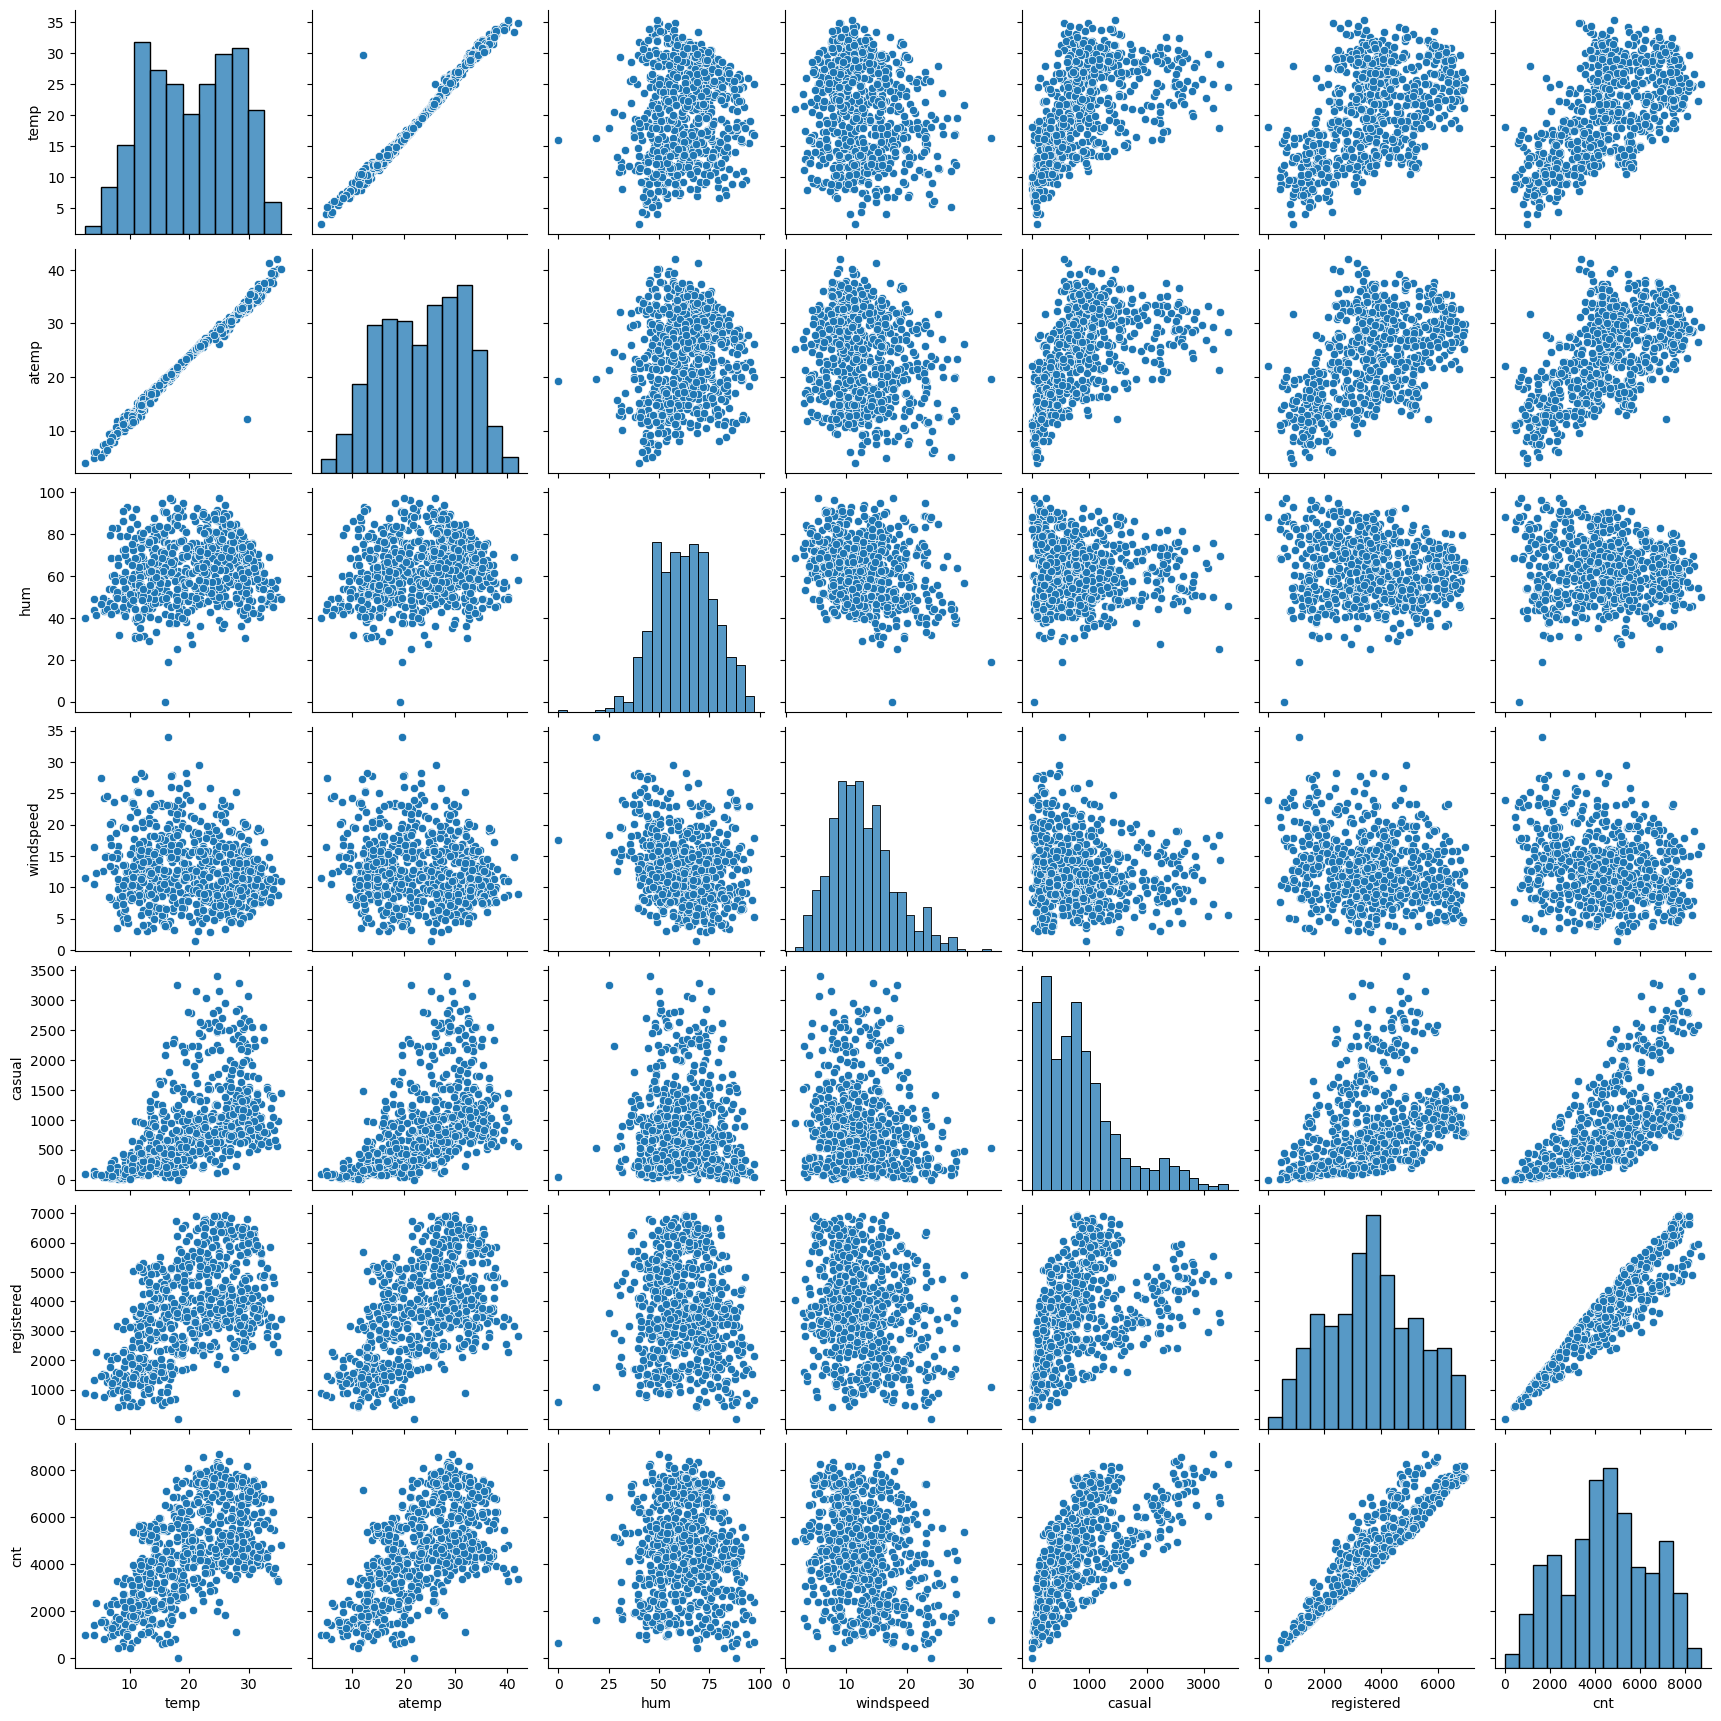

In [19]:
df_num = df.select_dtypes(include=['float64'])
sns.pairplot(df_num)
plt.show()

In [21]:
# because of the positive relation we are droping below columns 
df.drop(['atemp','registered'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    float64       
 13  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 80.0+ KB


In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,1,2018-01-01,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,331.0,985.0
1,2,2018-02-01,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,131.0,801.0
2,3,2018-03-01,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,120.0,1349.0
3,4,2018-04-01,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,108.0,1562.0
4,5,2018-05-01,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,82.0,1600.0


In [25]:
# droping index, date and casual(because we have cnt)  

df.drop(['instant', 'dteday', 'casual'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985.0
1,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801.0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600.0


In [28]:
# vars_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# scaler = MinMaxScaler()
# df = scaler.fit_transform(df[vars_list])
# df.head()


varlist = ['season', 'mnth', 'weekday', 'weathersit']
dummy1 = pd.get_dummies(df[varlist], drop_first=True)
df = pd.concat([df, dummy1], axis=1)
df = df.drop(varlist, axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_mist,weathersit_snow
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [71]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [72]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_mist,weathersit_snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


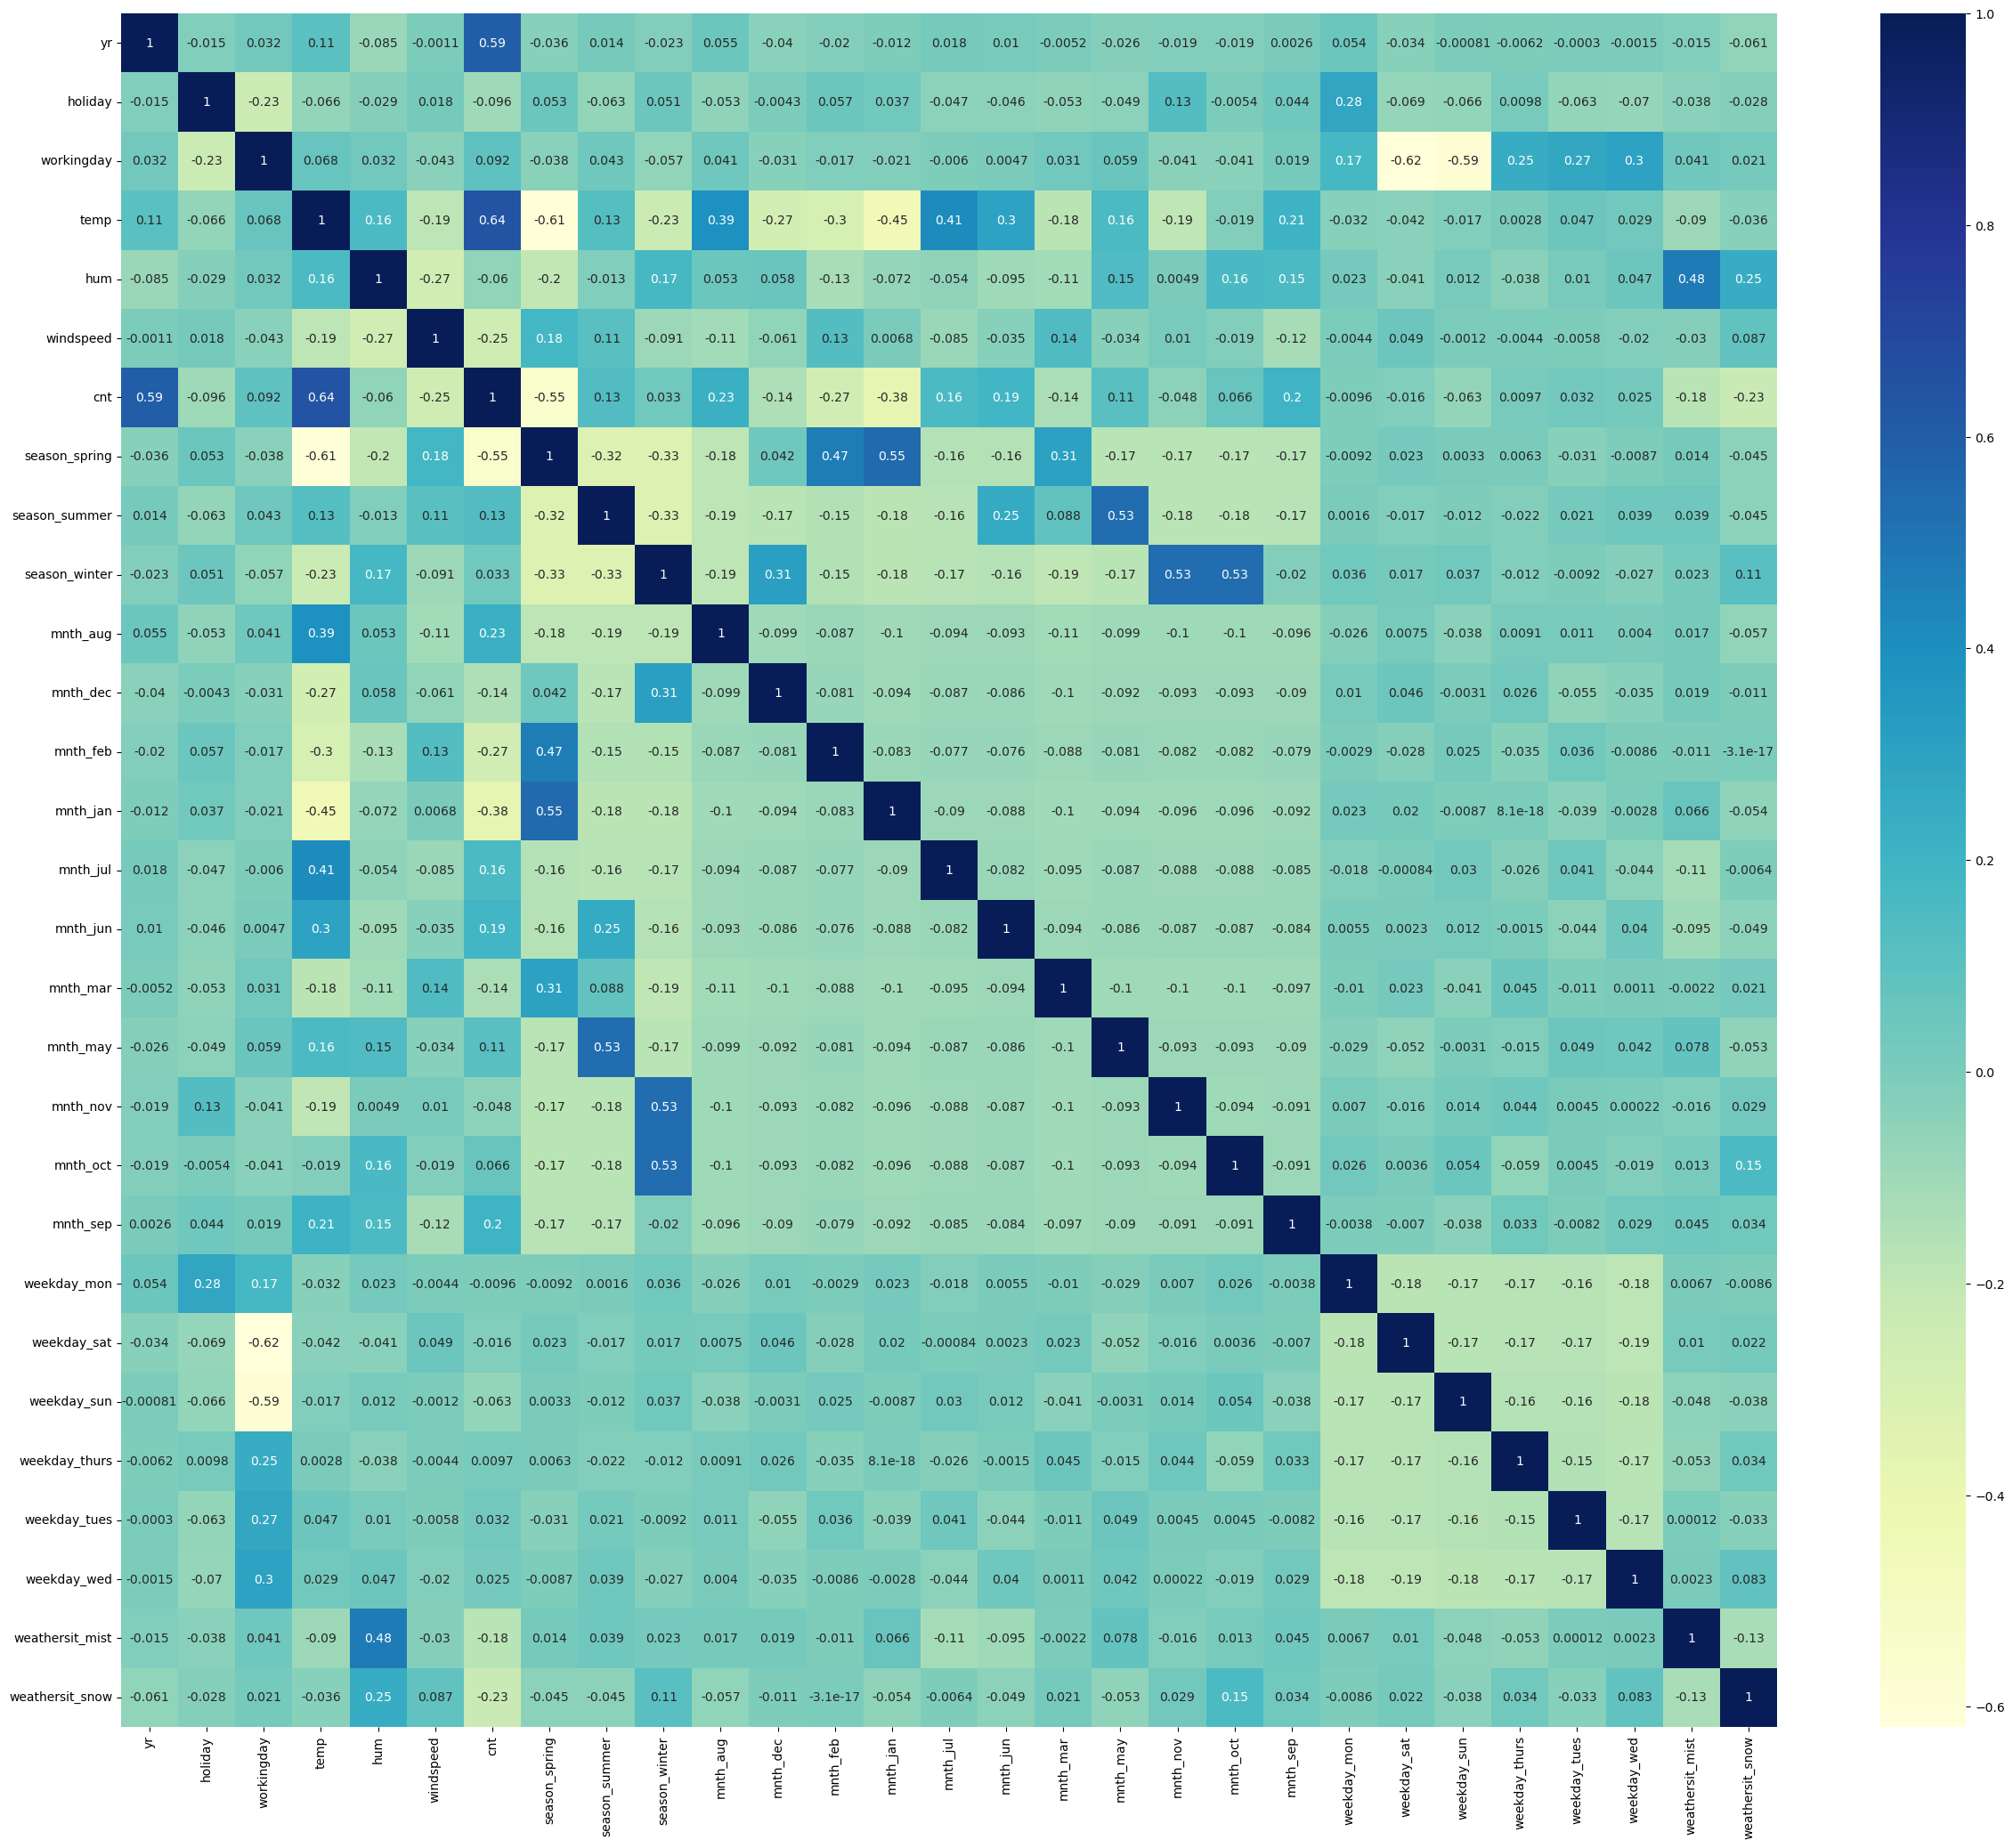

In [73]:
# plt.figure(figsize=(16,10))
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [74]:
y_train = df_train.pop('cnt')
X_train = df_train

In [75]:
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 1st model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.74e-182
Time:                        01:42:11   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2451      0.035      6.955      0.000       0.176       0.314
yr                  0.2321      0.008     28.820      0.000       0.216       0.248
holiday             0.0100      0.024      0.415      0.678      -0.037       0.057
workingday          0.0969      0.012      7.905      0.000       0.073       0.121
temp                0.4506      0.046      9.734      0.000       0.360       0.542
hum                -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed          -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring      -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer       0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter       0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug            0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar            0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may            0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct            0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep            0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon        -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_sat         0.0964      0.014      7.029      0.000       0.069       0.123
weekday_sun         0.0419      0.014      3.006      0.003       0.014       0.069
weekday_thurs      -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tues       -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wed        -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_mist    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.32e+16


In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,workingday,85.58
21,weekday_sat,19.72
22,weekday_sun,18.35
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
17,mnth_nov,6.80
18,mnth_oct,6.59
9,mnth_aug,6.43


In [77]:
X = X_train.drop('workingday', axis=1)
X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.74e-182
Time:                        01:42:42   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3420      0.044      7.767      0.000       0.255       0.428
yr                  0.2321      0.008     28.820      0.000       0.216       0.248
holiday            -0.0869      0.027     -3.269      0.001      -0.139      -0.035
temp                0.4506      0.046      9.734      0.000       0.360       0.542
hum                -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed          -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring      -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer       0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter       0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug            0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar            0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may            0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct            0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep            0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon        -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_sat        -0.0005      0.015     -0.033      0.974      -0.030       0.029
weekday_sun        -0.0550      0.015     -3.607      0.000      -0.085      -0.025
weekday_thurs      -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_tues       -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_wed        -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_mist    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_snow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         35.2
==============================================================================

Note

In [78]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
3,hum,38.19
2,temp,37.11
5,season_spring,11.81
7,season_winter,11.77
6,season_summer,6.89
17,mnth_oct,6.40
16,mnth_nov,6.12
8,mnth_aug,5.87
12,mnth_jul,5.26
11,mnth_jan,5.22


In [79]:
#droping season_spring as hum and temp p value is 0
X = X.drop('season_spring', axis=1)
X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 3rd model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.99e-182
Time:                        01:43:37   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3127      0.040      7.789      0.000       0.234       0.392
yr                  0.2318      0.008     28.742      0.000       0.216       0.248
holiday            -0.0879      0.027     -3.303      0.001      -0.140      -0.036
temp                0.4598      0.046      9.993      0.000       0.369       0.550
hum                -0.1537      0.039     -3.992      0.000      -0.229      -0.078
windspeed          -0.1897      0.026     -7.396      0.000      -0.240      -0.139
season_summer       0.0663      0.020      3.345      0.001       0.027       0.105
season_winter       0.1328      0.022      5.941      0.000       0.089       0.177
mnth_aug            0.0389      0.030      1.292      0.197      -0.020       0.098
mnth_dec           -0.0501      0.034     -1.496      0.135      -0.116       0.016
mnth_feb           -0.0510      0.031     -1.657      0.098      -0.112       0.009
mnth_jan           -0.0810      0.032     -2.563      0.011      -0.143      -0.019
mnth_jul           -0.0165      0.032     -0.518      0.605      -0.079       0.046
mnth_jun            0.0044      0.025      0.177      0.859      -0.044       0.053
mnth_mar           -0.0115      0.023     -0.495      0.621      -0.057       0.034
mnth_may            0.0223      0.021      1.064      0.288      -0.019       0.064
mnth_nov           -0.0405      0.036     -1.112      0.267      -0.112       0.031
mnth_oct            0.0076      0.036      0.213      0.831      -0.063       0.078
mnth_sep            0.1005      0.030      3.390      0.001       0.042       0.159
weekday_mon        -0.0204      0.015     -1.332      0.183      -0.051       0.010
weekday_sat        -0.0013      0.015     -0.090      0.928      -0.031       0.028
weekday_sun        -0.0555      0.015     -3.630      0.000      -0.085      -0.025
weekday_thurs      -0.0089      0.016     -0.570      0.569      -0.039       0.022
weekday_tues       -0.0189      0.016     -1.215      0.225      -0.049       0.012
weekday_wed        -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_mist    -0.0605      0.010     -5.793      0.000      -0.081      -0.040
weathersit_snow    -0.2546      0.026     -9.677      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [80]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,36.83
3,hum,36.59
6,season_winter,8.09
16,mnth_oct,6.24
15,mnth_nov,5.92
7,mnth_aug,5.20
4,windspeed,4.79
5,season_summer,4.74
11,mnth_jul,4.73
8,mnth_dec,4.38


In [81]:
#as month_oct as p value of 0.831 compare to the 3 above them
X = X.drop('mnth_oct', axis=1)

In [82]:
X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 4th model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.86e-183
Time:                        01:44:15   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3158      0.037      8.466      0.000       0.243       0.389
yr                  0.2317      0.008     28.786      0.000       0.216       0.248
holiday            -0.0876      0.027     -3.299      0.001      -0.140      -0.035
temp                0.4594      0.046     10.001      0.000       0.369       0.550
hum                -0.1527      0.038     -3.999      0.000      -0.228      -0.078
windspeed          -0.1897      0.026     -7.402      0.000      -0.240      -0.139
season_summer       0.0640      0.016      3.889      0.000       0.032       0.096
season_winter       0.1357      0.018      7.678      0.000       0.101       0.170
mnth_aug            0.0354      0.025      1.404      0.161      -0.014       0.085
mnth_dec           -0.0558      0.020     -2.774      0.006      -0.095      -0.016
mnth_feb           -0.0546      0.026     -2.124      0.034      -0.105      -0.004
mnth_jan           -0.0846      0.027     -3.189      0.002      -0.137      -0.032
mnth_jul           -0.0199      0.027     -0.728      0.467      -0.074       0.034
mnth_jun            0.0024      0.023      0.105      0.916      -0.043       0.047
mnth_mar           -0.0143      0.019     -0.733      0.464      -0.052       0.024
mnth_may            0.0211      0.020      1.046      0.296      -0.019       0.061
mnth_nov           -0.0470      0.019     -2.430      0.015      -0.085      -0.009
mnth_sep            0.0963      0.022      4.385      0.000       0.053       0.139
weekday_mon        -0.0205      0.015     -1.336      0.182      -0.051       0.010
weekday_sat        -0.0013      0.015     -0.088      0.930      -0.031       0.028
weekday_sun        -0.0554      0.015     -3.632      0.000      -0.085      -0.025
weekday_thurs      -0.0088      0.016     -0.569      0.570      -0.039       0.022
weekday_tues       -0.0189      0.016     -1.219      0.223      -0.049       0.012
weekday_wed        -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_mist    -0.0606      0.010     -5.809      0.000      -0.081      -0.040
weathersit_snow    -0.2545      0.026     -9.684      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       80.949   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.579
Skew:                          -0.780   Prob(JB):                     2.08e-48
Kurtosis:                       5.811   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.82
3,hum,33.21
4,windspeed,4.64
6,season_winter,4.51
7,mnth_aug,3.93
5,season_summer,3.72
11,mnth_jul,3.71
12,mnth_jun,2.54
10,mnth_jan,2.53
16,mnth_sep,2.47


In [84]:
# as value is 0.928
X = X.drop('weekday_sat', axis=1)

In [85]:
X_train_lm = sm.add_constant(X)

lr5 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 5th model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.63e-184
Time:                        01:44:41   Log-Likelihood:                 526.56
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3151      0.036      8.651      0.000       0.244       0.387
yr                  0.2317      0.008     28.816      0.000       0.216       0.248
holiday            -0.0876      0.027     -3.302      0.001      -0.140      -0.035
temp                0.4596      0.046     10.018      0.000       0.369       0.550
hum                -0.1528      0.038     -4.005      0.000      -0.228      -0.078
windspeed          -0.1898      0.026     -7.418      0.000      -0.240      -0.140
season_summer       0.0639      0.016      3.892      0.000       0.032       0.096
season_winter       0.1356      0.018      7.687      0.000       0.101       0.170
mnth_aug            0.0353      0.025      1.403      0.161      -0.014       0.085
mnth_dec           -0.0559      0.020     -2.778      0.006      -0.095      -0.016
mnth_feb           -0.0546      0.026     -2.126      0.034      -0.105      -0.004
mnth_jan           -0.0847      0.027     -3.194      0.001      -0.137      -0.033
mnth_jul           -0.0200      0.027     -0.731      0.465      -0.074       0.034
mnth_jun            0.0023      0.023      0.103      0.918      -0.043       0.047
mnth_mar           -0.0143      0.019     -0.735      0.462      -0.052       0.024
mnth_may            0.0211      0.020      1.049      0.295      -0.018       0.061
mnth_nov           -0.0470      0.019     -2.433      0.015      -0.085      -0.009
mnth_sep            0.0962      0.022      4.389      0.000       0.053       0.139
weekday_mon        -0.0198      0.013     -1.524      0.128      -0.045       0.006
weekday_sun        -0.0547      0.013     -4.257      0.000      -0.080      -0.029
weekday_thurs      -0.0081      0.013     -0.617      0.538      -0.034       0.018
weekday_tues       -0.0182      0.013     -1.379      0.169      -0.044       0.008
weekday_wed        -0.0051      0.012     -0.413      0.680      -0.030       0.019
weathersit_mist    -0.0605      0.010     -5.817      0.000      -0.081      -0.040
weathersit_snow    -0.2546      0.026     -9.703      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       81.146   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.840
Skew:                          -0.782   Prob(JB):                     1.83e-48
Kurtosis:                       5.811   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.56
3,hum,32.67
4,windspeed,4.55
6,season_winter,4.45
7,mnth_aug,3.92
11,mnth_jul,3.70
5,season_summer,3.67
12,mnth_jun,2.54
16,mnth_sep,2.46
10,mnth_jan,2.45


In [87]:
# 6 high p-value(0.827) and low VIF(1.55)
X = X.drop('weekday_thurs', axis=1)
X_train_lm = sm.add_constant(X)

lr6 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     122.0
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          2.84e-185
Time:                        01:45:00   Log-Likelihood:                 526.36
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3131      0.036      8.637      0.000       0.242       0.384
yr                  0.2317      0.008     28.830      0.000       0.216       0.247
holiday            -0.0881      0.026     -3.325      0.001      -0.140      -0.036
temp                0.4583      0.046     10.007      0.000       0.368       0.548
hum                -0.1529      0.038     -4.010      0.000      -0.228      -0.078
windspeed          -0.1895      0.026     -7.412      0.000      -0.240      -0.139
season_summer       0.0640      0.016      3.900      0.000       0.032       0.096
season_winter       0.1361      0.018      7.721      0.000       0.101       0.171
mnth_aug            0.0357      0.025      1.421      0.156      -0.014       0.085
mnth_dec           -0.0564      0.020     -2.807      0.005      -0.096      -0.017
mnth_feb           -0.0547      0.026     -2.130      0.034      -0.105      -0.004
mnth_jan           -0.0850      0.026     -3.210      0.001      -0.137      -0.033
mnth_jul           -0.0192      0.027     -0.705      0.481      -0.073       0.034
mnth_jun            0.0026      0.023      0.114      0.909      -0.042       0.047
mnth_mar           -0.0147      0.019     -0.757      0.449      -0.053       0.023
mnth_may            0.0211      0.020      1.048      0.295      -0.018       0.061
mnth_nov           -0.0480      0.019     -2.494      0.013      -0.086      -0.010
mnth_sep            0.0962      0.022      4.388      0.000       0.053       0.139
weekday_mon        -0.0171      0.012     -1.399      0.162      -0.041       0.007
weekday_sun        -0.0522      0.012     -4.292      0.000      -0.076      -0.028
weekday_tues       -0.0156      0.013     -1.248      0.212      -0.040       0.009
weekday_wed        -0.0025      0.012     -0.213      0.831      -0.025       0.020
weathersit_mist    -0.0602      0.010     -5.795      0.000      -0.081      -0.040
weathersit_snow    -0.2552      0.026     -9.738      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       80.512   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.874
Skew:                          -0.772   Prob(JB):                     1.09e-48
Kurtosis:                       5.830   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.19
3,hum,32.57
4,windspeed,4.55
6,season_winter,4.45
7,mnth_aug,3.92
11,mnth_jul,3.70
5,season_summer,3.66
12,mnth_jun,2.54
16,mnth_sep,2.46
10,mnth_jan,2.42


In [88]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.19
3,hum,32.57
4,windspeed,4.55
6,season_winter,4.45
7,mnth_aug,3.92
11,mnth_jul,3.70
5,season_summer,3.66
12,mnth_jun,2.54
16,mnth_sep,2.46
10,mnth_jan,2.42


In [89]:
#the r-square remain the same for the last two times so going further will not going to effect
y_train_pred = lr6.predict(X_train_lm)
y_train_pred

653    0.753934
576    0.722421
426    0.526396
728    0.346778
482    0.617087
         ...   
526    0.751976
578    0.837061
53     0.261016
350    0.276191
79     0.280603
Length: 510, dtype: float64

In [90]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [91]:
y_test = df_test.pop('cnt')
X_test = df_test

In [92]:
print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [93]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm.drop(['workingday', 'season_spring', 'mnth_oct', 'weekday_sat', 'weekday_thurs'], axis=1)

In [94]:
y_test_pred = lr6.predict(X_test_sm)

In [95]:
r2 = r2_score(y_test, y_test_pred)
r2

0.8207325154396544